In [1]:
import sys 
sys.path.append('../')

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

In [3]:
from fmds.models.diffusion.diffusionـsde import DiffusionSDE 

In [4]:
n_samples = 1000

In [5]:
data , _ = make_swiss_roll(n_samples, noise=0.5)

In [6]:
data=data[:,[0,2]]

In [7]:
data.shape

(1000, 2)

In [8]:
data = torch.tensor(data, dtype = torch.float32)

In [25]:
diffusion_sde = DiffusionSDE(data,
                             input_dimension  = 2,
                             hidden_dimension  = 16,
                             number_hidden_layers=3,
                             output_dimension  = 2 ,
                                
                                   epochs =10000, 
                             lr  = 0.015
                             )


In [26]:
diffusion_sde.fit()

Epoch 0, Loss: 1.0332145690917969
Epoch 100, Loss: 1.0009756088256836
Epoch 200, Loss: 0.9861646294593811
Epoch 300, Loss: 0.9634096622467041
Epoch 400, Loss: 0.92022705078125
Epoch 500, Loss: 0.9498036503791809
Epoch 600, Loss: 0.9383434057235718
Epoch 700, Loss: 0.9748630523681641
Epoch 800, Loss: 0.8742102384567261
Epoch 900, Loss: 0.9394877552986145
Epoch 1000, Loss: 0.8363057971000671
Epoch 1100, Loss: 0.8633794784545898
Epoch 1200, Loss: 0.8690377473831177
Epoch 1300, Loss: 0.8766230344772339
Epoch 1400, Loss: 0.8641350865364075
Epoch 1500, Loss: 0.8688128590583801
Epoch 1600, Loss: 0.9241747260093689
Epoch 1700, Loss: 0.8413388729095459
Epoch 1800, Loss: 0.8899433612823486
Epoch 1900, Loss: 0.8191508650779724
Epoch 2000, Loss: 0.8692786693572998
Epoch 2100, Loss: 0.873680055141449
Epoch 2200, Loss: 0.8320775032043457
Epoch 2300, Loss: 0.8328853249549866
Epoch 2400, Loss: 0.809135377407074
Epoch 2500, Loss: 0.8843095302581787
Epoch 2600, Loss: 0.8819459676742554
Epoch 2700, Loss:

In [27]:
synthetic_data = diffusion_sde.generate( 
                 
                   n_samples=1000,
                 steps=1000,
                 step_size=0.0001,  # Fixed type annotation
                 num_corrector_steps=5,
                 batch_size=100   )

In [19]:
torch.std(data, dim=0)

tensor([6.5367, 6.9677])

In [20]:
torch.std(synthetic_data, dim=0)

tensor([2.5642, 2.6271])

In [21]:
data_np = data.detach().numpy()
data_np = data_np[~np.isnan(data_np).any(axis=1)]
synthetic_data_np = synthetic_data.detach().numpy()
synthetic_data_np = synthetic_data_np[~np.isnan(synthetic_data_np).any(axis=1)]

Text(0.5, 1.0, 'Synthetic Data Generated by SDE with Predictor-Corrector')

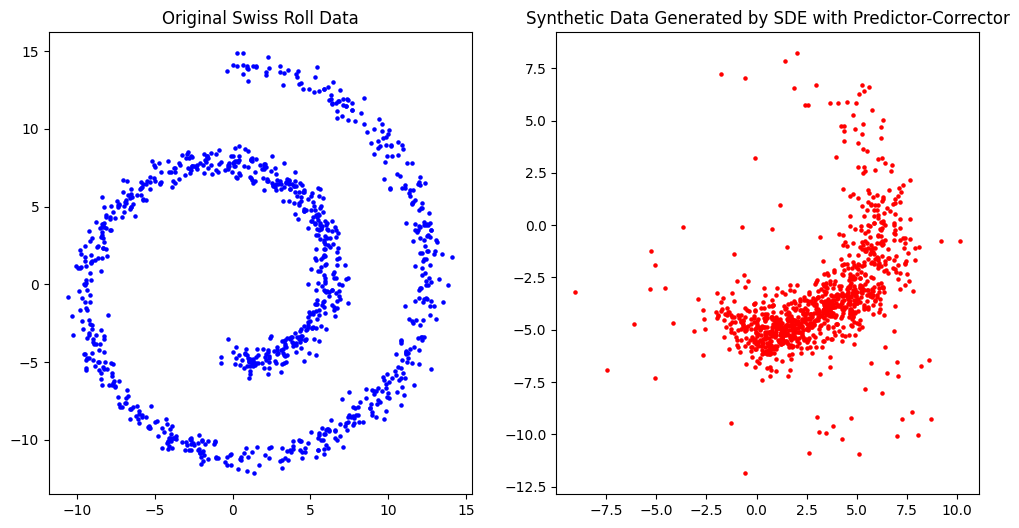

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(data_np[:,0], data_np[:,1], s=5, color ='blue')
plt.title('Original Swiss Roll Data')
plt.subplot(1,2,2)
plt.scatter(synthetic_data_np[:,0], 
            synthetic_data_np[:,1],
            s=5,
            color='red')
plt.title('Synthetic Data Generated by SDE with Predictor-Corrector')
            

In [23]:
from research.plots import qqplot

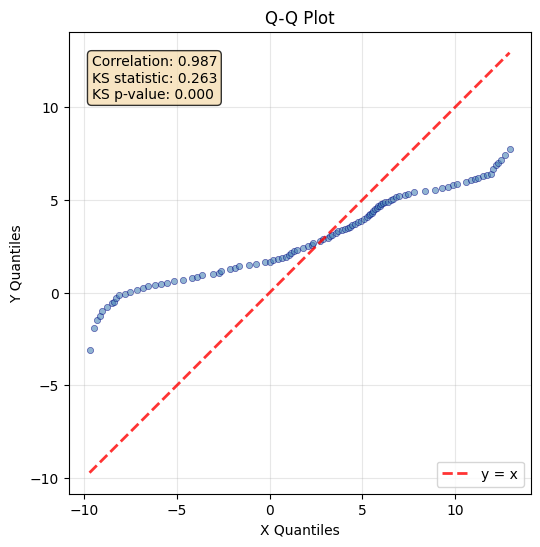

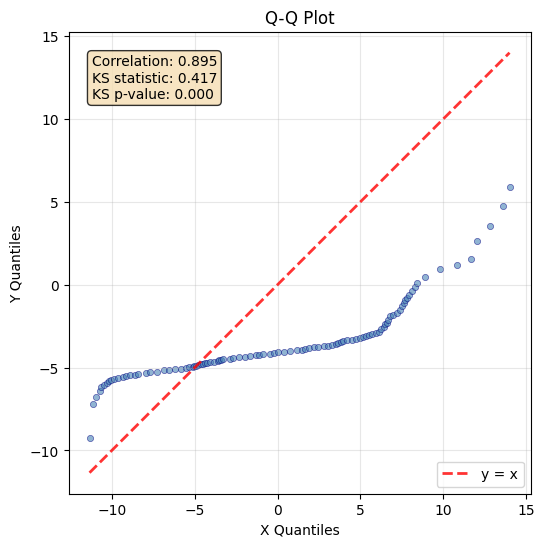

In [24]:
for i in range(0,2):
    _=qqplot(x=data_np[:,i], y= synthetic_data_np[:,i])
    plt.show()
    plt.close()